In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [237]:
bike = pd.read_csv('../kaggle/data/df_rides.csv')
# https://github.com/josegrlopes/bikesharingsystem_BrasiliaBR

In [238]:
bike.info()
# Total data 287.322
#ride_data = ok
#time_start = ok
#station_start = ok
# station_end = ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287322 entries, 0 to 287321
Data columns (total 10 columns):
user_gender       286926 non-null object
user_birthdate    287321 non-null object
user_residence    107417 non-null object
ride_date         287322 non-null object
time_start        287322 non-null object
time_end          244037 non-null object
station_start     287322 non-null object
station_end       287322 non-null object
ride_duration     214148 non-null float64
ride_late         214148 non-null float64
dtypes: float64(2), object(8)
memory usage: 21.9+ MB


In [239]:
#Retirei uma data de nascimento null.
bike.drop(index=37921,axis=0,inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287321 entries, 0 to 287321
Data columns (total 10 columns):
user_gender       286925 non-null object
user_birthdate    287321 non-null object
user_residence    107416 non-null object
ride_date         287321 non-null object
time_start        287321 non-null object
time_end          244036 non-null object
station_start     287321 non-null object
station_end       287321 non-null object
ride_duration     214147 non-null float64
ride_late         214147 non-null float64
dtypes: float64(2), object(8)
memory usage: 24.1+ MB


In [240]:
bike.reset_index(inplace=True)
bike.head()

,index,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [241]:
bike.drop(columns='index', inplace=True)

In [242]:
bike.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [243]:
bike['ride_date'].min()

'2018-01-01'

In [244]:
bike['ride_date'].max()

'2018-08-31'

In [245]:
len(bike['station_start'].unique())

50

In [246]:
len(bike['station_end'].unique())

50

In [247]:
bike['user_birthdate'] = bike['user_birthdate'].apply( lambda x: dt.strptime(x, '%Y-%m-%d'))

In [248]:
bike['user_birthdate'][0].year

1971

In [249]:
bike['age'] = 0

In [250]:
bike['age'] = bike['user_birthdate'].apply(lambda x: int((dt.now() - x).days/365))

In [251]:
cols = [10,0,1,2,3,4,5,6,7,8,9]
bike = bike[bike.columns[cols]]
bike.head()

,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,48,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,30,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,51,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,27,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,50,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [252]:
bike[bike['age'] < 0]

,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
25214,-1,M,2021-03-30,NaN,2018-02-01,11:58:10,12:03:48,6 - Rodoviária,20 - SAS,5.633333,0.0
25218,-1,M,2021-08-20,DF,2018-02-01,12:04:39,12:15:39,21 - EQS 202 / 203,34 - Shopping Mall,11.000000,0.0
25273,-1,F,2021-08-14,NaN,2018-02-01,13:02:59,13:18:30,2 - Praça Buriti,11 - Rodoviária 2,15.516667,0.0
25275,-1,M,2021-08-04,DF,2018-02-01,13:03:42,13:18:27,38 - SQN 205,41 - Instituto de Artes,14.750000,0.0
25276,-1,F,2021-08-04,DF,2018-02-01,13:03:49,13:18:32,2 - Praça Buriti,11 - Rodoviária 2,14.716667,0.0
...,...,...,...,...,...,...,...,...,...,...,...
43669,-1,F,2020-12-28,NaN,2018-02-28,08:19:56,08:29:20,35 - CLN 403,39 - CLN 406,9.400000,0.0
43843,-1,M,2021-01-28,NaN,2018-02-28,12:41:58,13:03:42,39 - CLN 406,23 - STF,21.733333,0.0
43916,-1,M,2021-11-05,NaN,2018-02-28,13:34:50,13:40:35,34 - Shopping Mall,32 - SQS 305,5.750000,0.0
44163,-6,M,2026-03-18,NaN,2018-02-28,17:39:02,18:31:05,15 - Brasil 21,15 - Brasil 21,52.050000,0.0


In [253]:
# Removendo idades menores que 5.
bike = bike[bike['age'] > 5].reset_index()

In [254]:
bike.drop(columns='index',axis=1, inplace=True)
bike.head()

,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,48,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,30,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,51,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,27,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,50,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [255]:
bike.describe()

,age,ride_duration,ride_late
count,280469.000000,208880.000000,208880.000000
mean,30.056106,29.926249,0.098727
std,9.920045,58.962466,0.298295
min,6.000000,3.000000,0.000000
25%,23.000000,8.083333,0.000000
50%,27.000000,14.200000,0.000000
75%,35.000000,33.733333,0.000000
max,91.000000,999.483333,1.000000


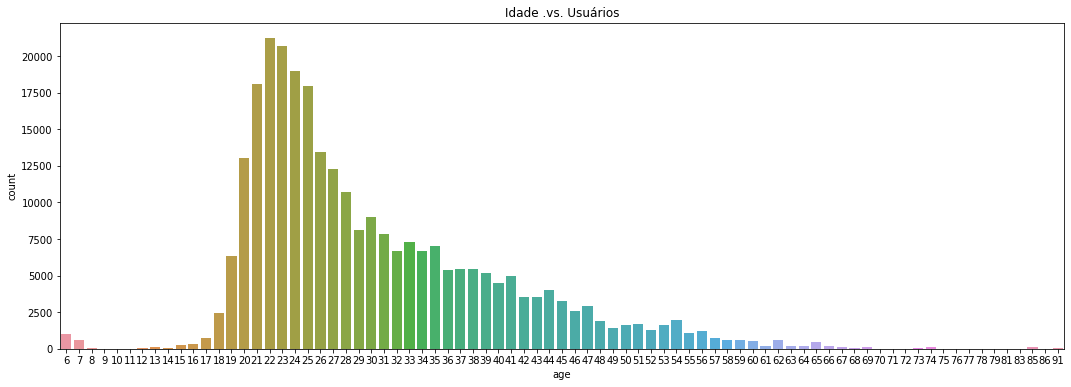

In [256]:
fig = plt.figure(figsize=(18,6))
sns.countplot(x='age', data=bike).set_title('Idade .vs. Usuários');

In [257]:
bike['ride_date'] = bike['ride_date'].apply( lambda x: dt.strptime(x, '%Y-%m-%d'))

In [258]:
bike['weekday'] = 0

In [259]:
# Monday is 0 and Sunday is 6.
bike['weekday'] = bike['ride_date'].apply( lambda x: x.weekday())

In [260]:
bike['weekday'].replace({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}, inplace=True)

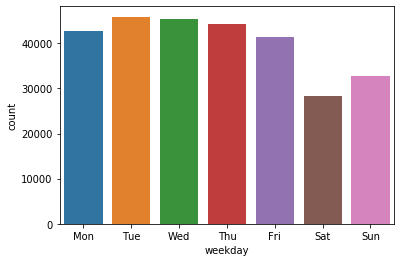

In [261]:
sns.countplot(x='weekday', data=bike);

In [262]:
bike['month'] = 0

In [263]:
bike['month'] = bike['ride_date'].apply( lambda x: int((x.month)))

In [ ]:
bike.head(2)

In [264]:
bike_per_month = bike.groupby('month').count().reset_index()

In [265]:
###bike_per_month.replace()
bike_per_month['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug'}, inplace=True)

In [266]:
bike_per_month

,month,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,weekday
0,Jan,24385,24382,24385,11229,24385,24385,24385,24385,24385,24367,24367,24385
1,Feb,18430,18423,18430,8303,18430,18430,18430,18430,18430,18407,18407,18430
2,Mar,29057,29022,29057,4809,29057,29057,29057,29057,29057,137,137,29057
3,Apr,34170,34131,34170,13382,34170,34170,34170,34170,34170,34131,34131,34170
4,May,43123,43040,43123,16044,43123,43123,43123,43123,43123,43076,43076,43123
5,Jun,42431,42366,42431,16136,42431,42431,0,42431,42431,0,0,42431
6,Jul,43140,43071,43140,16039,43140,43140,43140,43140,43140,43083,43083,43140
7,Aug,45733,45693,45733,16248,45733,45733,45733,45733,45733,45679,45679,45733


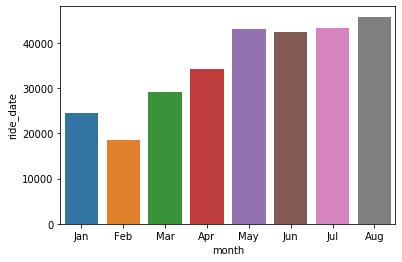

In [267]:
sns.barplot(x='month', y='ride_date', data=bike_per_month);

In [393]:
# 178279 Nulos na coluna
bike['user_residence'].describe()

count     102190
unique       245
top           DF
freq       84350
Name: user_residence, dtype: object

In [269]:
bike['ride_duration'].isnull().sum()

71589

In [270]:
ride_duration = bike['ride_duration'].dropna()
ride_duration.count()

208880

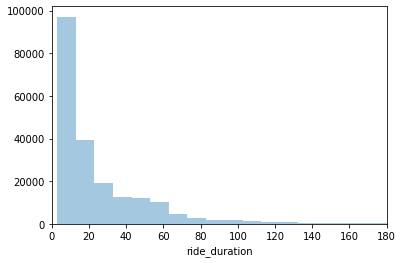

In [271]:
fig, ax = plt.subplots()
sns.distplot(ride_duration, kde=False, bins=100, hist=True)
ax.set_xlim(0,180);

In [398]:
bike[bike['ride_duration'] > 15]

,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,weekday,month
0,48,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0,Mon,1
2,51,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0,Mon,1
4,50,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0,Mon,1
6,48,M,1971-02-21,NaN,2018-01-01,07:02:37,07:22:27,30 - TSE,11 - Rodoviária 2,19.833333,0.0,Mon,1
9,49,M,1970-06-22,NaN,2018-01-01,07:25:21,07:43:25,4 - Torre de TV,4 - Torre de TV,18.066667,0.0,Mon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280457,59,F,1960-05-10,NaN,2018-08-31,22:21:46,22:53:24,47 - EQN 410/411,6 - Rodoviária,31.633333,0.0,Fri,8
280458,22,M,1997-08-04,NaN,2018-08-31,22:21:54,07:51:29,1 - Memorial JK,1 - Memorial JK,569.583333,1.0,Fri,8
280463,24,M,1995-05-23,NaN,2018-08-31,22:59:20,23:19:30,44 - ICC Sul,6 - Rodoviária,20.166667,0.0,Fri,8
280464,25,M,1994-01-16,DF,2018-08-31,23:11:42,23:40:20,47 - EQN 410/411,47 - EQN 410/411,28.633333,0.0,Fri,8


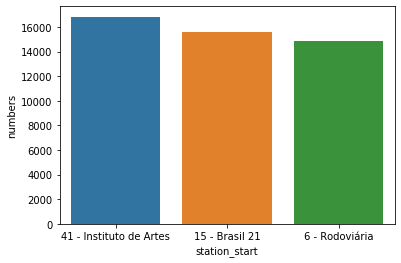

In [353]:
station_start = bike.groupby('station_start').count()
station_start.reset_index(inplace=True)
station_start = station_start.sort_values(by='age', ascending=False).head(3).copy()
station_start.rename(columns={'age':'numbers'}, inplace=True)
sns.barplot(x='station_start', y = 'numbers', data=station_start);

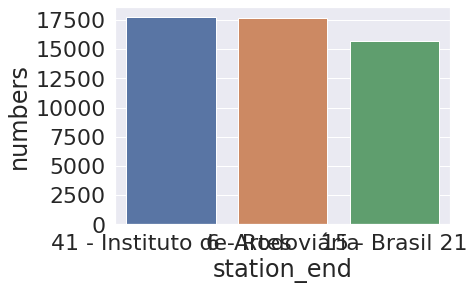

In [431]:
station_end = bike.groupby('station_end').count()
station_end.reset_index(inplace=True)
station_end = station_end.sort_values(by='age', ascending=False).head(3).copy()
station_end.rename(columns={'age':'numbers'}, inplace=True)
sns.barplot(x='station_end', y = 'numbers', data=station_end)
sns.set(font_scale=1)

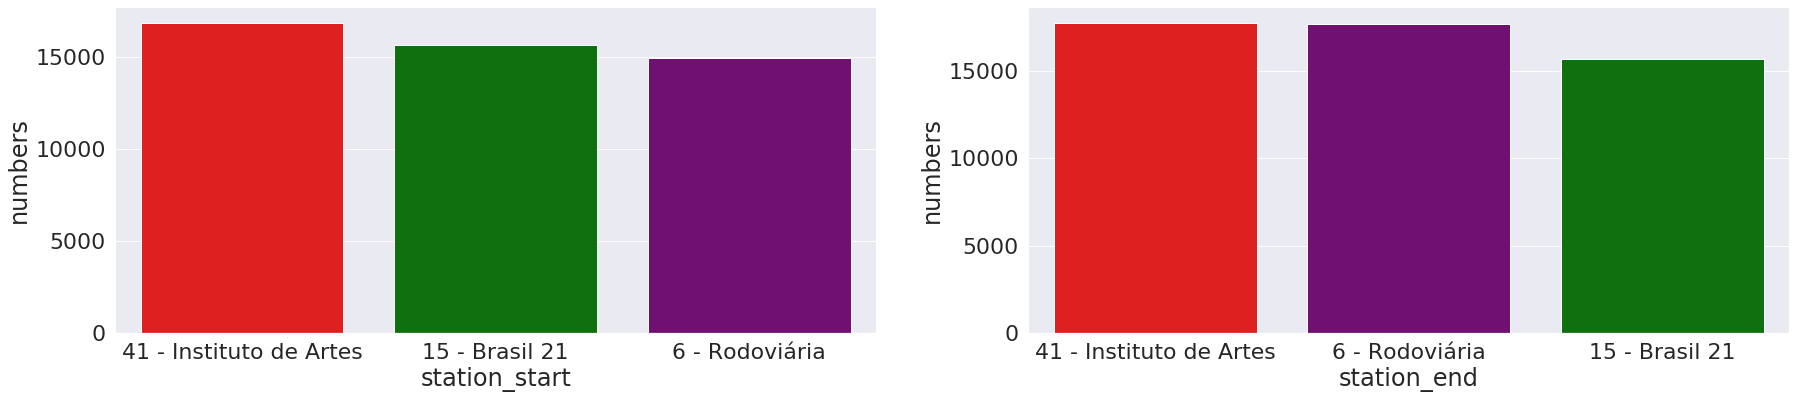

In [415]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(30,6))
clrs1 = ['red', 'green', 'purple']
clrs2 = ['red', 'purple', 'green']

sns.barplot(x='station_start', y = 'numbers', data=station_start, ax= ax[0], palette=clrs1)
sns.barplot(x='station_end', y = 'numbers', data=station_end, ax= ax[1], palette=clrs2)
sns.set(font_scale=3)

In [411]:
#------------ Saindo do Instituto de Artes

In [357]:
bike.head(2)

,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,weekday,month
0,48,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0,Mon,1
1,30,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0,Mon,1


In [367]:
bike_artes = bike[bike['station_start'] == '41 - Instituto de Artes']

In [421]:
bike_artes3 = bike_artes.groupby('station_end').count().sort_values(by='age', ascending=False).head(3)
bike_artes3.reset_index(inplace=True)
bike_artes3.head()

,station_end,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,ride_duration,ride_late,weekday,month
0,45 - Centro Olímpico,5273,5228,5273,1179,5273,5273,4585,5273,3921,3921,5273,5273
1,39 - CLN 406,2075,2073,2075,617,2075,2075,1791,2075,1440,1440,2075,2075
2,42 - PAT,1263,1260,1263,341,1263,1263,1097,1263,781,781,1263,1263


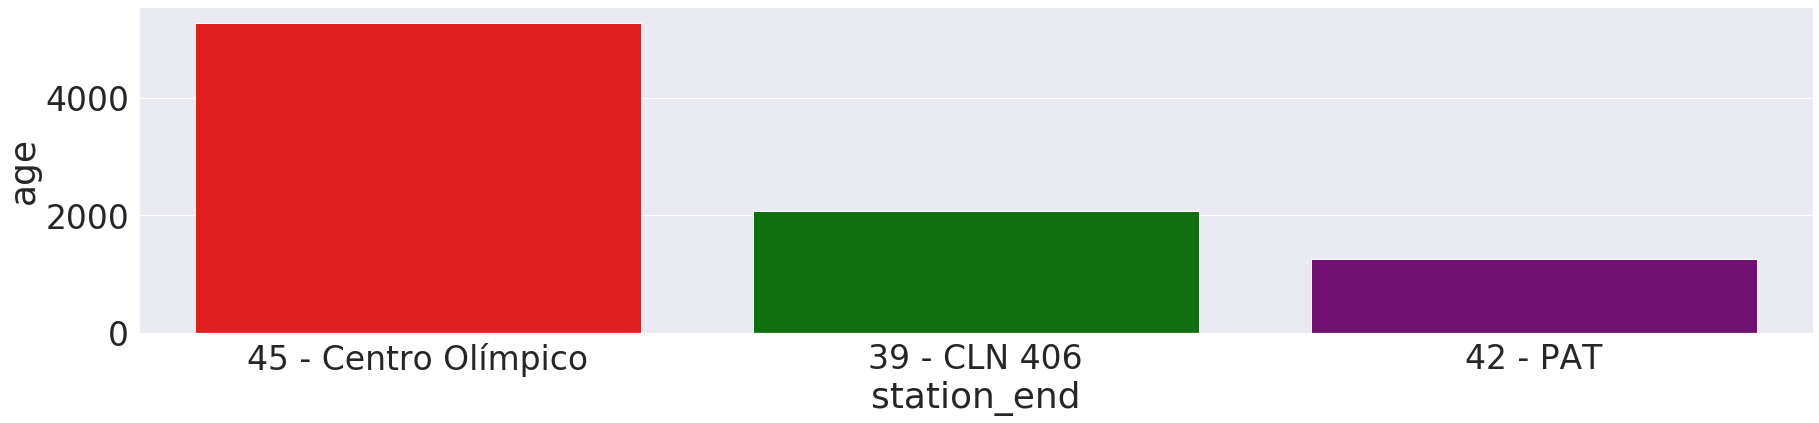

In [427]:
fig = plt.figure(figsize=(30,6))
clr1 = ['red', 'green', 'purple']
clr2 = ['red', 'purple', 'green']

sns.barplot(x='station_end', y = 'age', data=bike_artes3, palette=clrs1)
sns.set(font_scale=3)

In [370]:
bike_olimpic = bike[bike['station_start'] == '45 - Centro Olímpico']

In [435]:
bike_olimpic3 = bike_olimpic.groupby('station_end').count().sort_values(by='age', ascending=False).head(3)

In [447]:
bike_olimpic3.rename(columns={'age':'numbers'}, inplace=True)

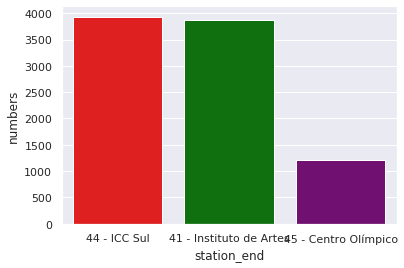

In [448]:
sns.barplot(x=bike_olimpic3.index, y = 'numbers', data=bike_olimpic3, palette=clrs1)